In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bycicle.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df = df.drop(columns=['Date'])

In [6]:
df['Day']

0      2016-04-01 00:00:00
1      2016-04-02 00:00:00
2      2016-04-03 00:00:00
3      2016-04-04 00:00:00
4      2016-04-05 00:00:00
              ...         
205    2016-04-26 00:00:00
206    2016-04-27 00:00:00
207    2016-04-28 00:00:00
208    2016-04-29 00:00:00
209    2016-04-30 00:00:00
Name: Day, Length: 210, dtype: object

In [7]:
df['Day'] = pd.to_datetime(df['Day'])

In [9]:
import datetime

def get_week(date):
    day_of_week = date.strftime('%A')
    if day_of_week == "Saturday" or day_of_week == "Sunday":
        return 0
    else:
        return 1


In [11]:
df['weekday'] = df['Day'].apply(get_week)

In [25]:
df['weekday'] = df['weekday'].map({0: 'Weekend', 1: 'Weekday'})

In [13]:
nan_columns = df.columns[df.isna().any()].tolist()

if len(nan_columns) > 0:
    print("Columns with NaN values:")
    for col in nan_columns:
        print(col)
else:
    print("No columns have NaN values.")


No columns have NaN values.


In [15]:
duplicates = df['Day'].duplicated()

duplicated_rows = df[duplicates]
print("Rows with duplicated values:")
print(len(duplicated_rows))

Rows with duplicated values:
180


In [16]:
df = df.drop_duplicates(subset='Day', keep='first')

In [17]:
df.head()

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekday,month
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,1,April
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,0,April
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,0,April
3,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335,1,April
4,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471,1,April


In [18]:
df = df.rename(columns={
    'High Temp (°F)': 'high_temp',
    'Low Temp (°F)': 'low_temp',
    "Brooklyn Bridge":"Brooklyn_Bridge",
    "Manhattan Bridge":"Manhattan_Bridge",
    "Williamsburg Bridge":"Williamsburg_Bridge",
    "Queensboro Bridge":"Queensboro_Bridge",
})

In [27]:
df['mean_temp'] = (df['high_temp'] + df['low_temp'] ) / 2

In [20]:
df['Precipitation'] = df['Precipitation'].replace("0.47 (S)","0.47")

In [21]:
df['Precipitation'] = df['Precipitation'].replace("T","0")

In [22]:
df['Precipitation'] = df['Precipitation'].astype(float)

## Ruajme Databasen e Re

In [29]:
df.to_csv("clean.csv")

# Statistike Deskriptive

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

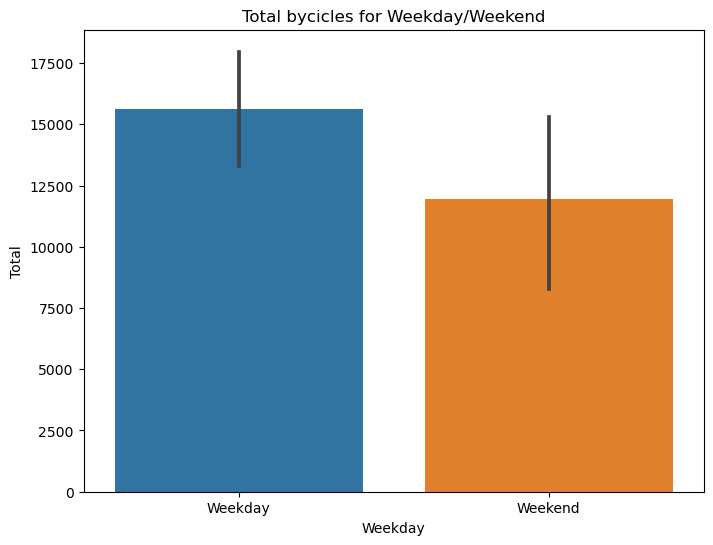

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weekday', y='Total', data=df)
plt.title('Total bycicles for Weekday/Weekend')
plt.xlabel('Weekday')
plt.ylabel('Total')
plt.show()

In [38]:
df.head()

,Day,high_temp,low_temp,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total,weekday,mean_temp
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,Weekday,72.05
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,Weekend,51.95
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,Weekend,36.95
3,2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335,Weekday,38.60
4,2016-04-05,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471,Weekday,34.10


Gjejme mesatarisht sa bicikleta ne total kane udhetuar gjate gjithe muajit prill ne kater urat(kolona totali).


In [39]:
mean_ninth_column = df.iloc[:, 8].mean()
print("Mean of the ninth column:", mean_ninth_column)
max_ninth_column = df.iloc[:, 8].max()
print("Max of the ninth column:", max_ninth_column)
min_ninth_column = df.iloc[:, 8].min()
print("Min of the ninth column:", min_ninth_column)
median_ninth_column = df.iloc[:, 8].median()
print("Median of the ninth column:", median_ninth_column)
max_ninth_column = df.iloc[:, 8].max()
print("Max of the ninth column:", mean_ninth_column)

Mean of the ninth column: 14534.5
Max of the ninth column: 23318
Min of the ninth column: 4335
Median of the ninth column: 15292.5
Max of the ninth column: 14534.5


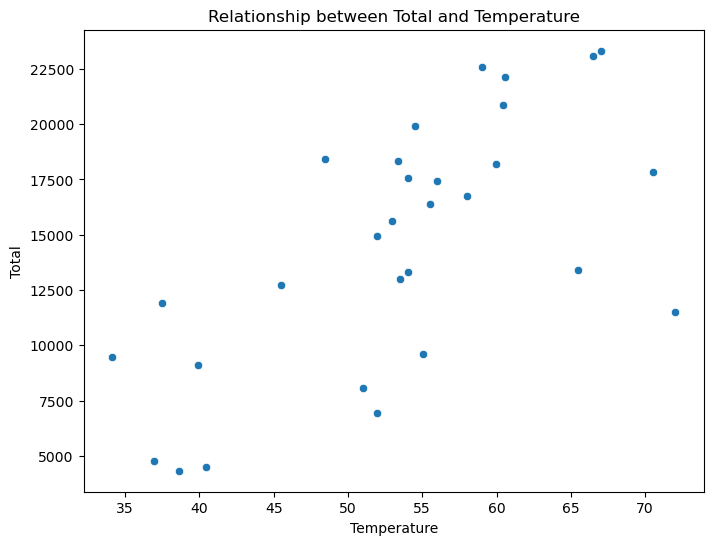

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean_temp', y='Total', data=df)
plt.xlabel('Temperature')
plt.ylabel('Total')
plt.title('Relationship between Total and Temperature')
plt.show()

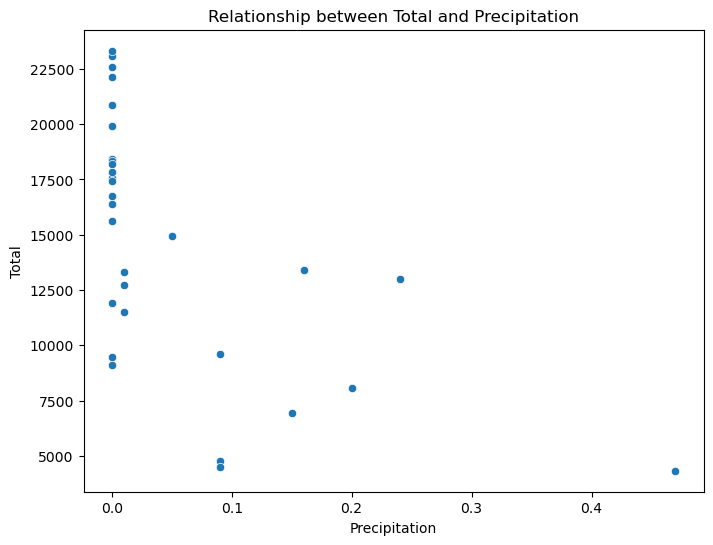

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Precipitation', y='Total', data=df)
plt.xlabel('Precipitation')
plt.ylabel('Total')
plt.title('Relationship between Total and Precipitation')
plt.show()

## Machine Learning

In [49]:
df.head()

,Day,high_temp,low_temp,Precipitation,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total,weekday,mean_temp
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,Weekday,72.05
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,Weekend,51.95
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,Weekend,36.95
3,2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335,Weekday,38.60
4,2016-04-05,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471,Weekday,34.10


In [50]:
df = df.drop(columns=['Day','Brooklyn_Bridge','Manhattan_Bridge','Williamsburg_Bridge','Queensboro_Bridge'])

In [56]:
df = df.drop(columns=['mean_temp'])

In [57]:
df.head()

,high_temp,low_temp,Precipitation,Total,weekday
0,78.1,66.0,0.01,11497,0
1,55.0,48.9,0.15,6922,1
2,39.9,34.0,0.09,4759,1
3,44.1,33.1,0.47,4335,0
4,42.1,26.1,0.00,9471,0


In [52]:
df['weekday'] = df['weekday'].map({"Weekday":0,"Weekend":1})

In [54]:
df.corr()

,high_temp,low_temp,Precipitation,Total,weekday,mean_temp
high_temp,1.000000,0.823853,-0.345898,0.743344,-0.107708,0.962046
low_temp,0.823853,1.000000,-0.165441,0.492124,-0.137974,0.947259
Precipitation,-0.345898,-0.165441,1.000000,-0.591079,0.013562,-0.275223
Total,0.743344,0.492124,-0.591079,1.000000,-0.305580,0.657221
weekday,-0.107708,-0.137974,0.013562,-0.305580,1.000000,-0.127326
mean_temp,0.962046,0.947259,-0.275223,0.657221,-0.127326,1.000000


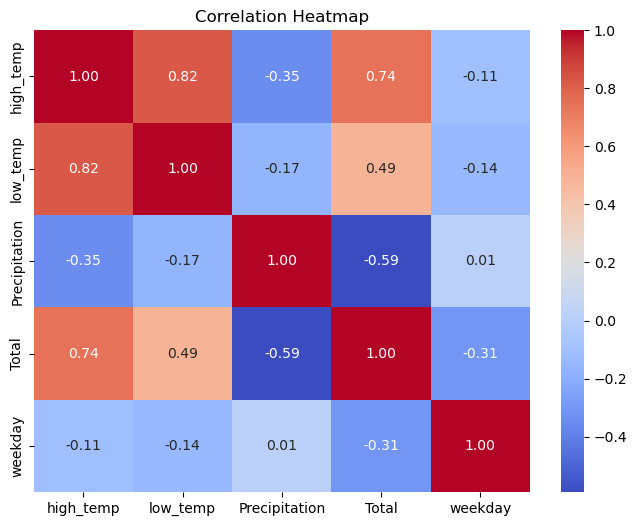

In [58]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Test/Train Split

In [102]:
X = df[['high_temp','low_temp','Precipitation','weekday']]

In [103]:
y = df['Total']

In [104]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Krijimi i modelit

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lm = LinearRegression()

In [170]:
lm.fit(X_train,y_train)

LinearRegression()

In [171]:
predictions = lm.predict(X_test)

## Saktesia

In [172]:
from sklearn import metrics

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1690.1830618117237
MSE: 2908417.0331281032
RMSE: 1705.408172001091


In [174]:
predictions

array([10761.76487885,  5937.63848419, 11344.32441991])

In [175]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [176]:
r2_score(y_test,predictions )

0.8130729289233469

In [177]:
lm.intercept_

-1059.3577291730799

In [178]:
lm.coef_

array([   419.24626929,   -173.40943102, -19417.15133323,  -2710.83231013])

DecisionTreeRegressor

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
model = DecisionTreeRegressor()

In [197]:
X_train.head()

,high_temp,low_temp,Precipitation,weekday
23,68.0,48.0,0.0,1
29,64.0,48.0,0.0,1
14,64.0,44.1,0.0,0
11,57.0,45.0,0.2,0
15,66.0,45.0,0.0,1


In [188]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [189]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [190]:
print("R2 per train eshte :" ,r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))



R2 per train eshte : 1.0
0.980293054935439


In [191]:
print('Mae per test data eshte:',mean_absolute_error(y_test,y_test_pred).round(2))
print('Mae per train data eshte:',mean_absolute_error(y_train,y_train_pred).round(2))

Mae per test data eshte: 498.33
Mae per train data eshte: 0.0


In [192]:
print('MSE per test data eshte:',mean_squared_error(y_test,y_test_pred).round(2))
print('MSE per train data eshte:',mean_squared_error(y_train,y_train_pred).round(2))

MSE per test data eshte: 306622.33
MSE per train data eshte: 0.0


Overfitting

In [193]:
model2=DecisionTreeRegressor(min_samples_split=8, max_depth=4)

In [194]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=8)

In [195]:
y_train=model2.predict(X_train)
y_test=model2.predict(X_test)

In [196]:
print('Metrics:')
print("R2 per train data eshte :" ,r2_score(y_train,y_train_pred))
print("R2 per test data eshte :",r2_score(y_test,y_test_pred))
print('Mae per test data eshte:',mean_absolute_error(y_test,y_test_pred).round(2))
print('Mae per train data eshte:',mean_absolute_error(y_train,y_train_pred).round(2))
print('MSE per test data eshte:',mean_squared_error(y_test,y_test_pred).round(2))
print('MSE per train data eshte:',mean_squared_error(y_train,y_train_pred).round(2))

Metrics:
R2 per train data eshte : 0.8387158448974652
R2 per test data eshte : 0.7889117510854476
Mae per test data eshte: 1172.4
Mae per train data eshte: 1560.7
MSE per test data eshte: 1703355.87
MSE per train data eshte: 4184063.53
